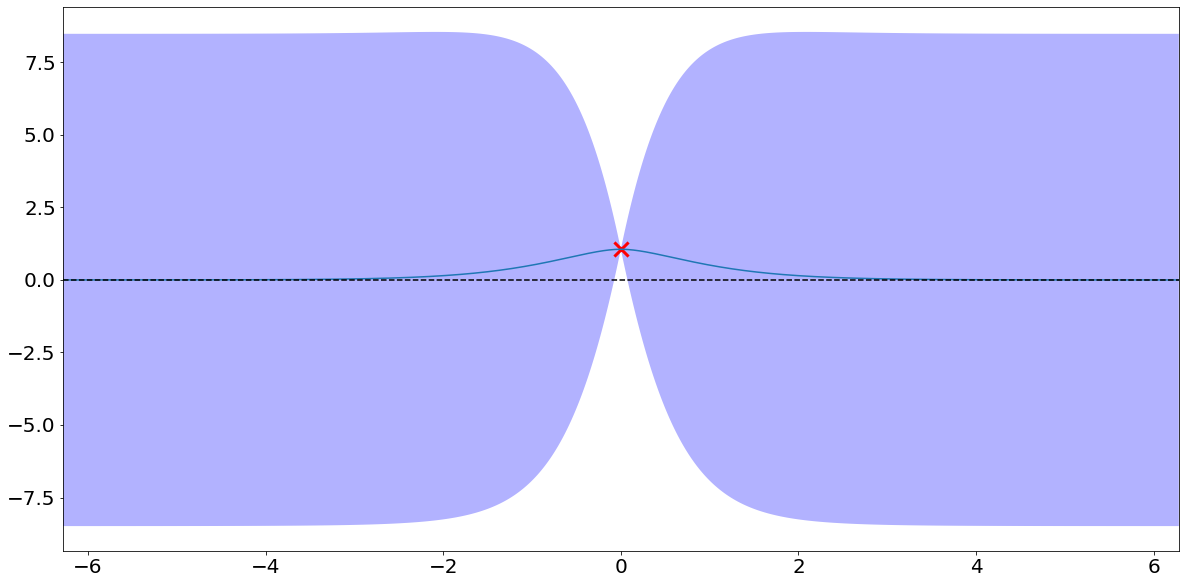

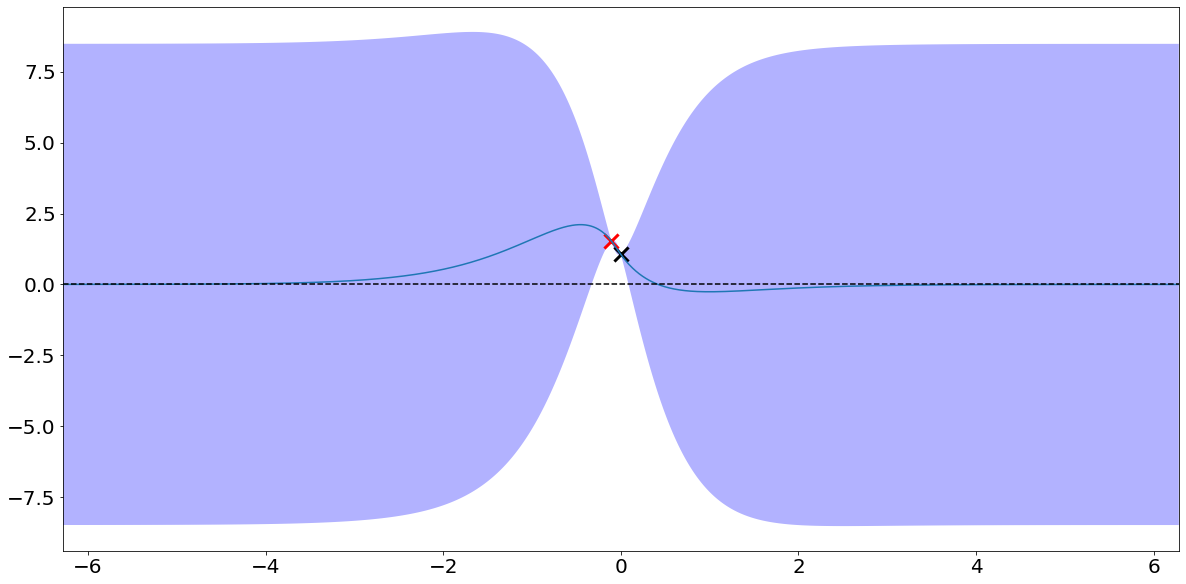

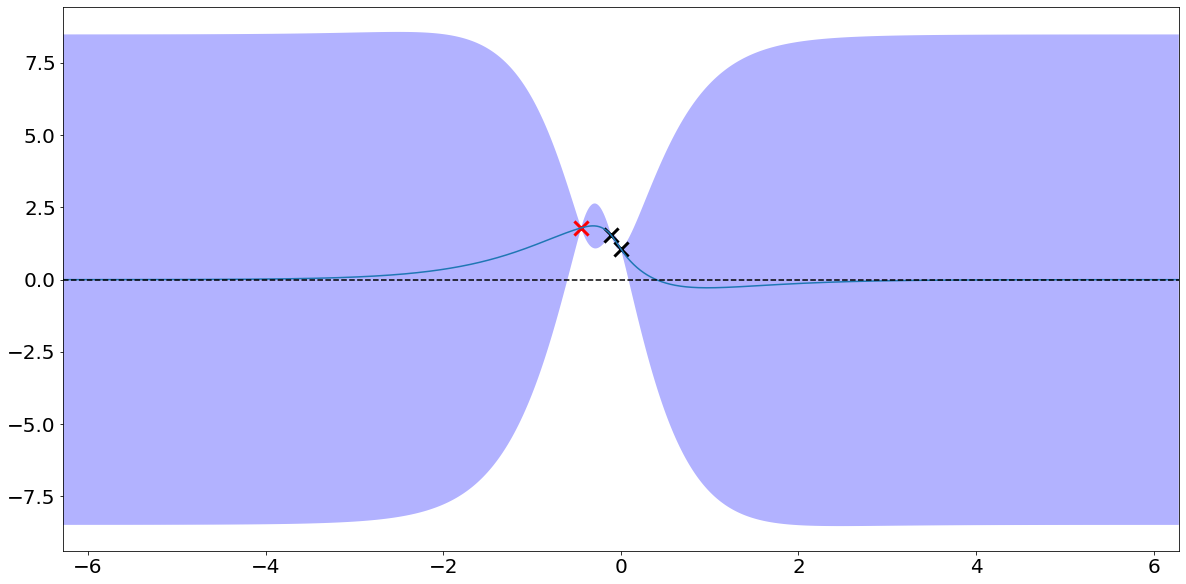

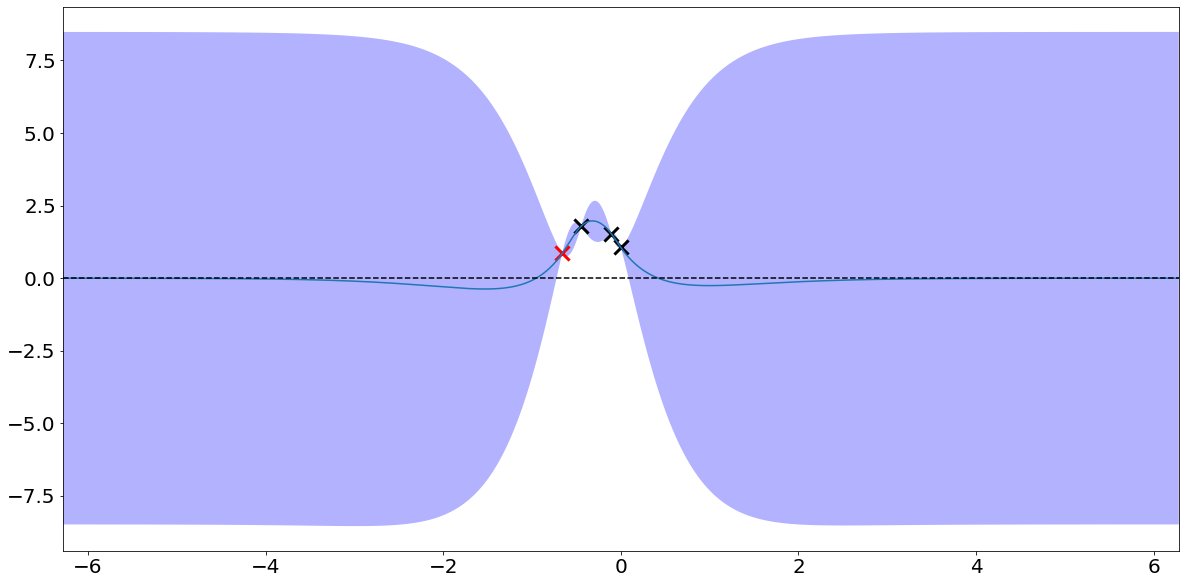

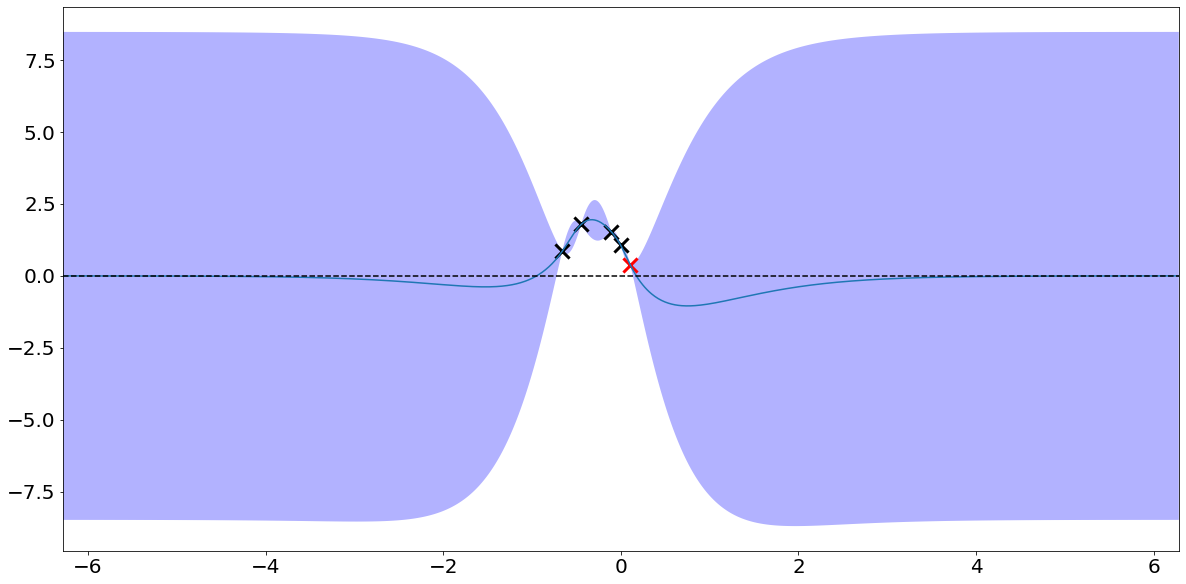

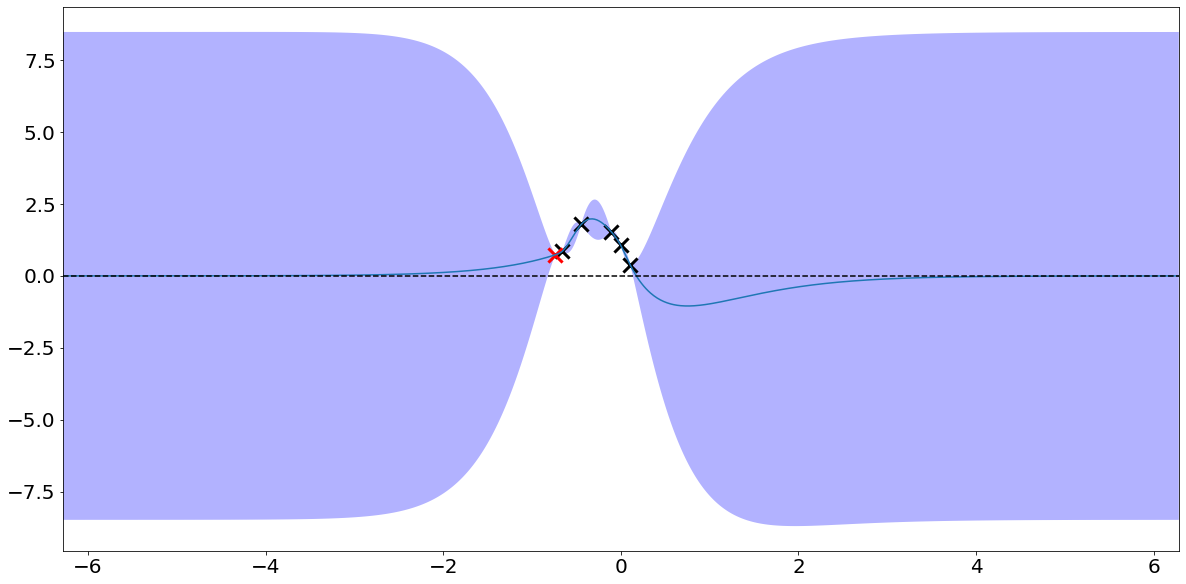

In [14]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import safeopt
import objective_functions as ob

mpl.rcParams["figure.figsize"] = (20.0, 10.0)
mpl.rcParams["font.size"] = 20
mpl.rcParams["lines.markersize"] = 20

# Measurement noise
noise_var = 0.005 ** 2

# Bounds on the inputs variable
bounds = [(-2 * np.pi, 2 * np.pi)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

# Define Kernel
# kernel = GPy.kern.RBF(input_dim=len(bounds), variance=8.0, lengthscale=0.25, ARD=True)
kernel = GPy.kern.Matern32(input_dim=len(bounds), variance=4.0, ARD=True)

# Generate function with safe initial point at x=0
def sample_safe_fun():
    while True:
        fun = safeopt.sample_gp_function(kernel, bounds, noise_var, 100)
        if fun(0, noise=False) > 0.5:
            break
    return fun

# Initial safe point
x0 = np.zeros((1, len(bounds)))

# Define the objective function
fun = sample_safe_fun()

# The statistical model of our objective function
gp = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)

# The optimization routine
# opt = safeopt.SafeOptSwarm(gp, 0., bounds=bounds, threshold=0.2)
opt = safeopt.SafeOpt(gp, parameter_set, fmin=0.0, lipschitz=None, threshold=0.2)


def plot_gp(t=0):
    # Plot the GP
    opt.plot(1000)
    # Plot the true function
    # plt.plot(parameter_set, fun(parameter_set), color="C2", alpha=0.3)

plot_gp()

for i in range(5):
    # Obtain next query point
    x_next = opt.optimize()
    # Get a measurement from the real system
    y_meas = fun(x_next)
    # Add this to the GP model
    opt.add_new_data_point(x_next, y_meas)

    plot_gp(t=i + 1)

In [1]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define Kernel
kernel = GPy.kern.RBF(input_dim=1, variance=2.0, lengthscale=1.0, ARD=True)

{'covariance': [[<matplotlib.lines.Line2D at 0x7f8ea2546f10>]]}

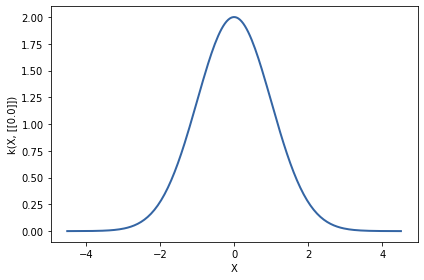

In [8]:
kernel.plot

In [15]:
import numpy as np
import pandas as pd

In [16]:
q = np.linspace(-1, 1, 25)
r_cost = np.linspace(-1, 1, 25)
a = np.asarray(np.meshgrid(q, r_cost)).T.reshape(-1, 2)

In [17]:
data = pd.read_csv("panda-robot_dbo_11_May_11_17_42_log.csv")

(625, 2)

In [ ]:
input = a
mean, var = opt.opt.gps[1].predict(input)  # predicting `g1` for input
std = np.sqrt(var)
l_x0 = mean - opt.opt.beta(opt.opt.t) * std  # lower bound of constraint function value
safe_idx = np.where(l_x0 >= 0)[0]  # taking function value g1>=0 as safe
values = np.zeros(a.shape[0])  # start by taking all values as 0 to denote unsafe
values[safe_idx] = 1  # update safe values as 1

mean, var = opt.opt.gps[0].predict(input)  # predicting `f` for input
l_f = mean - opt.opt.beta(opt.opt.t) * std  # lower bound of objective function value

safe_l_f = l_f[safe_idx]  # safe function values
safe_max = np.where(l_f == safe_l_f.max())[0]  # safe maximum
optimum_params = a[safe_max, :]  # take corresponding params 
optimum_params = optimum_params.squeeze()
q = np.reshape(a[:, 0], [25, 25])  # reshaping 0th (q) column to 25x25
r_cost = np.reshape(a[:, 1], [25, 25])  # reshaping 1st (r) column to 25x25
values = values.reshape([25, 25])  # reshaping safe_sate values to 25x25
colours = ["red", "green"]
fig = plt.figure(figsize=(10, 10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
ax.set_xlabel("q")
ax.set_ylabel("r")
cs = ax.contourf(q * 6, r_cost * 3, values)
ax.scatter(
    q * 6,
    r_cost * 3,
    c=values,
    cmap=matplotlib.colors.ListedColormap(colours),
)
ax.scatter(
    optimum_params[0] * 6,
    optimum_params[1] * 3,
    marker="<",
    color="b",
    s=np.asarray([200]),
)
ax.set_title("Safe Set Belief, iter " + str(i))
ax.set_ylim([-3.1, 3.1])
ax.set_xlim([-6.1, 6.1])

In [19]:
15**2

225